# Quickstart
## Basic inference
The easiest way to get started is by using the {class}`~fastdfe.base_inference.BaseInference` class which infers the DFE from a single pair of frequency spectra, one neutral and one selected. In this example we create {class}`~fastdfe.spectrum.Spectrum` objects holding the SFS counts and pass them to {class}`~fastdfe.base_inference.BaseInference`. Note that we are required to specify the number of monomorphic sites (the last and first entries of the specified counts which correspond to the number of mono-allelic sites where the ancestral and derived allele is fixed, respectively).

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [4.8, 3.3]
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

In [2]:
import fastdfe as fd

inf = fd.BaseInference(
    sfs_neut=fd.Spectrum([177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652]),
    sfs_sel=fd.Spectrum([797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794])
)

# run inference
inf.run();

INFO:Discretization: Precomputing linear DFE-SFS transformation using midpoint integration.
BaseInference>Performing inference: 100%|██████████| 10/10 [00:00<00:00, 16.20it/s]
INFO:BaseInference: Successfully finished optimization after 62 iterations and 450 function evaluations, obtaining a log-likelihood of -34.63216290436293.
INFO:BaseInference: Inferred parameters: {all.S_d: -9868.112222890215, all.b: 0.15081009477849364, all.p_b: 0.0, all.S_b: 0.0010478204324131362, all.eps: 0.006854711964659445}.


fastDFE uses maximum likelihood estimation (MLE) to find the DFE. By default, 10 local optimization runs are carried out to make sure a reasonably good global optimum has been bound. The DFE furthermore needs to parametrized where {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default.

We can now plot the inferred DFE in discretized form (cf. {func}`~fastdfe.base_inference.BaseInference.plot_discretized`).

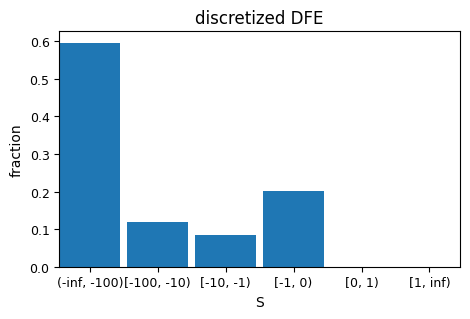

In [3]:
inf.plot_discretized();

We can also plot a comparison of the (selected) modelled and observed SFS (cf. {func}`~fastdfe.base_inference.BaseInference.plot_sfs_comparison`).

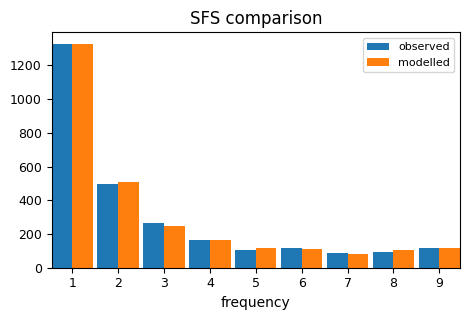

In [4]:
inf.plot_sfs_comparison();

## Bootstrapping

We can perform parametric bootstrapping (cf. {func}`~fastdfe.base_inference.BaseInference.bootstrap`)

BaseInference>Bootstrapping: 100%|██████████| 100/100 [00:01<00:00, 62.17it/s]


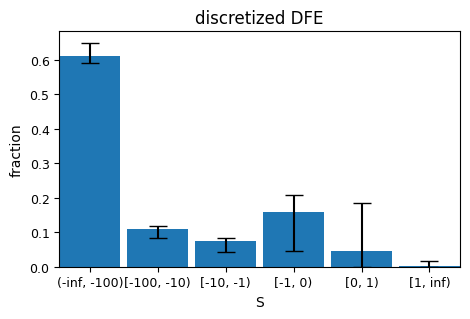

In [5]:
inf.bootstrap(n_samples=100)

# redo the plotting
inf.plot_discretized();

## Serialization

In [6]:
# save the inference object to the file
# we can unserialized the inference by using BaseInference.from_file
inf.to_file("out/serialized.json")

# alternatively we can also save a summary to file
inf.get_summary().to_file("out/summary.json")